In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use('plotting.mplstyle')
import numpy as np
np.random.seed(11)
import json
import h5py
import os

In [2]:
# Load AR results
precomputed_data = h5py.File("./../data/ar_lnm1_q_summary.hdf","r")
m1s = precomputed_data['posterior/m1s'][()]
dR_dlnm1s = precomputed_data['posterior/dR_dlnm1s'][()]

## 1. Calculate significance of 10 Msun peak

In [3]:
# We will determine if a peak is present by comparing mean merger rates across an interval
# below the possible peak, an interval containing the peak, and an interval above the peak

# Find indices of m1 array closest to our target mass locations (7.5, 9, 11, and 13.5 Msun)
m_i = 7.5
m_ii = 9.
m_iii = 11.
m_iv = 13.5
ind_7p5 = np.argmin(np.abs(m1s-m_i))
ind_9 = np.argmin(np.abs(m1s-m_ii))
ind_11 = np.argmin(np.abs(m1s-m_iii))
ind_13p5 = np.argmin(np.abs(m1s-m_iv))

# Compute mean merger rate across the three intervals defined by these masses
mean_R_7p5_to_9 = np.trapz(dR_dlnm1s[ind_7p5:ind_9,:],np.log10(m1s[ind_7p5:ind_9]),axis=0)/np.log10(m_ii/m_i)
mean_R_9_to_11 = np.trapz(dR_dlnm1s[ind_9:ind_11,:],np.log10(m1s[ind_9:ind_11]),axis=0)/np.log10(m_iii/m_ii)
mean_R_11_to_13p5 = np.trapz(dR_dlnm1s[ind_11:ind_13p5,:],np.log10(m1s[ind_11:ind_13p5]),axis=0)/np.log10(m_iv/m_iii)

# Get fraction of traces in which merger rate on first and third intervals is lower than in the middle interval
peak_present_10Msun = (mean_R_9_to_11>mean_R_7p5_to_9)*(mean_R_9_to_11>mean_R_11_to_13p5)
significance_10Msun = np.sum(peak_present_10Msun)/peak_present_10Msun.size
significance_10Msun

0.9595555555555556

## 2. Calculate significance of 35 Msun peak

In [4]:
# Find indices of m1 array closest to our target mass locations (7.5, 9, 11, and 13.5 Msun)
m_i = 20.
m_ii = 28.
m_iii = 40.
m_iv = 55.
ind_20 = np.argmin(np.abs(m1s-m_i))
ind_28 = np.argmin(np.abs(m1s-m_ii))
ind_40 = np.argmin(np.abs(m1s-m_iii))
ind_55 = np.argmin(np.abs(m1s-m_iv))

# Compute mean merger rate 
mean_R_20_to_28 = np.trapz(dR_dlnm1s[ind_20:ind_28,:],np.log10(m1s[ind_20:ind_28]),axis=0)/np.log10(m_ii/m_i)
mean_R_28_to_40 = np.trapz(dR_dlnm1s[ind_28:ind_40,:],np.log10(m1s[ind_28:ind_40]),axis=0)/np.log10(m_iii/m_ii)
mean_R_40_to_55 = np.trapz(dR_dlnm1s[ind_40:ind_55,:],np.log10(m1s[ind_40:ind_55]),axis=0)/np.log10(m_iv/m_iii)

peak_present_35Msun = (mean_R_28_to_40>mean_R_20_to_28)*(mean_R_28_to_40>mean_R_40_to_55)
significance_35Msun = np.sum(peak_present_35Msun)/peak_present_35Msun.size
significance_35Msun

0.9297777777777778

## 3. Significance of steepening in the mass spectrum

In [5]:
# First, define a characteristic power-law slope in the BBH rate at low masses

# Get average merger rate in the 15-16 Msun interval
ind_15 = np.argmin(np.abs(m1s-15.))
ind_16 = np.argmin(np.abs(m1s-16.))
mean_R_15_to_16 = np.trapz(dR_dlnm1s[ind_15:ind_16,:],np.log10(m1s[ind_15:ind_16]),axis=0)/np.log(16./15.)

# And in the 24-25 Msun interval
ind_24 = np.argmin(np.abs(m1s-24.))
ind_25 = np.argmin(np.abs(m1s-25.))
mean_R_24_to_25 = np.trapz(dR_dlnm1s[ind_24:ind_25,:],np.log10(m1s[ind_24:ind_25]),axis=0)/np.log(25./24.)

# Together, use these rates to define a characteristic power-law slope spanning the 15-25 Msun range
slope_15_to_25 = np.log10(mean_R_24_to_25/mean_R_15_to_16)/np.log10(25./15.)

# Similarly, define a characteristic slope at high masses

# Get the mean merger rate in the 45-46 Msun interval
ind_45 = np.argmin(np.abs(m1s-45.))
ind_46 = np.argmin(np.abs(m1s-46.))
mean_R_45_to_46 = np.trapz(dR_dlnm1s[ind_45:ind_46,:],np.log10(m1s[ind_45:ind_46]),axis=0)/np.log(46./45.)

# And in the 74-75 Msun interval
ind_74 = np.argmin(np.abs(m1s-74.))
ind_75 = np.argmin(np.abs(m1s-75.))
mean_R_74_to_75 = np.trapz(dR_dlnm1s[ind_74:ind_75,:],np.log10(m1s[ind_74:ind_75]),axis=0)/np.log(75./74.)

# Define the corresponding high-mass power-law slope
slope_45_to_70 = np.log10(mean_R_74_to_75/mean_R_45_to_46)/np.log10(75./45.)

# Find the fraction of samples for which the high-mass slope is more negative than the low-mass slope
steepening = (slope_45_to_70<slope_15_to_25)
significance_steepening = np.sum(steepening)/steepening.size
significance_steepening

0.9137777777777778

## 4. Plot these summary statistics!

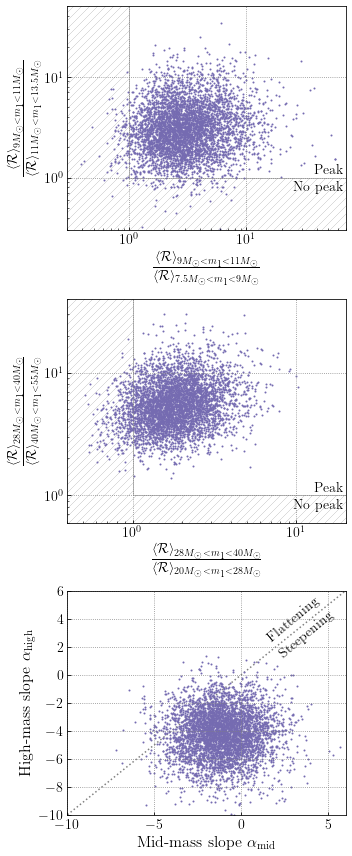

In [6]:
fig = plt.figure(figsize=(5,12))

ax = fig.add_subplot(311)
ax.set_rasterization_zorder(1)
ax.scatter(mean_R_9_to_11/mean_R_7p5_to_9,
           mean_R_9_to_11/mean_R_11_to_13p5,s=1,color='#756bb1',zorder=0)

ax.tick_params(labelsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.3,70)
ax.set_ylim(0.3,50)

ax.set_xlabel(r'$\frac{\langle \mathcal{R}\rangle_{9 M_\odot<m_1<11 M_\odot}}{\langle \mathcal{R}\rangle_{7.5 M_\odot<m_1<9 M_\odot}}$',
             fontsize=20)
ax.set_ylabel(r'$\frac{\langle \mathcal{R}\rangle_{9 M_\odot<m_1<11 M_\odot}}{\langle \mathcal{R}\rangle_{11 M_\odot<m_1<13.5 M_\odot}}$',
             fontsize=20)

ax.text(0.99, 0.245, 'Peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.99, 0.165, 'No peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.fill_between([0.3,70],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.fill_betweenx([1,50],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.plot([1,1,70],[50,1,1],color='grey',zorder=-1,lw=0.5)

ax = fig.add_subplot(312)
ax.set_rasterization_zorder(1)
ax.scatter(mean_R_28_to_40/mean_R_20_to_28,
           mean_R_28_to_40/mean_R_40_to_55,s=1,color='#756bb1',zorder=0)

ax.tick_params(labelsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.4,20)
ax.set_ylim(0.6,40)

ax.set_xlabel(r'$\frac{\langle \mathcal{R}\rangle_{28 M_\odot<m_1<40 M_\odot}}{\langle \mathcal{R}\rangle_{20 M_\odot<m_1<28 M_\odot}}$',
             fontsize=20)
ax.set_ylabel(r'$\frac{\langle \mathcal{R}\rangle_{28 M_\odot<m_1<40 M_\odot}}{\langle \mathcal{R}\rangle_{40 M_\odot<m_1<55 M_\odot}}$',
             fontsize=20)

ax.text(0.99, 0.13, 'Peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.99, 0.05, 'No peak',
        verticalalignment='bottom',
        horizontalalignment='right',
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.fill_between([0.4,40],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.fill_betweenx([1,40],[1,1],hatch='///',facecolor='None',zorder=-1,linewidth=0)
ax.plot([1,1,40],[40,1,1],color='grey',zorder=-1,lw=0.5)

ax = fig.add_subplot(313)
ax.set_rasterization_zorder(1)
ax.scatter(slope_15_to_25,slope_45_to_70,s=1,color='#756bb1',zorder=0)

ax.tick_params(labelsize=14)
ax.set_xlim(-10,6)
ax.set_ylim(-10,6)

ax.set_xlabel(r'Mid-mass slope $\alpha_\mathrm{mid}$',fontsize=16)
ax.set_ylabel(r'High-mass slope $\alpha_\mathrm{high}$',fontsize=16)

ax.text(0.91, 0.76, 'Flattening',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=40.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.text(0.96, 0.69, 'Steepening',
        verticalalignment='bottom',
        horizontalalignment='right',
        rotation=40.,
        transform=ax.transAxes,
        color='black',
        fontsize=14)

ax.plot([-10,6],[-10,6],color='grey',ls=':',zorder=-1)

plt.tight_layout()
plt.savefig('figure_04.pdf',dpi=200,bbox_inches='tight')

## 5. Also save out summary statistics as latex macros

In [7]:
with open('./../macros/significance_lnm1_features.txt','w') as macrofile:
    
    macrofile.write("\\newcommand{{\\MassSignificancePercentageLowPeak}}{{{0:.0f}\\%}}".format(100.*significance_10Msun))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\MassSignificancePercentageHighPeak}}{{{0:.0f}\\%}}".format(100.*significance_35Msun))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\MassSignificanceLowSlope}}{{{0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}}}".format(\
        np.median(slope_15_to_25),
        np.quantile(slope_15_to_25,0.95) - np.median(slope_15_to_25),
        np.median(slope_15_to_25) - np.quantile(slope_15_to_25,0.05)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\MassSignificanceHighSlope}}{{{0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}}}".format(\
        np.median(slope_45_to_70),
        np.quantile(slope_45_to_70,0.95) - np.median(slope_45_to_70),
        np.median(slope_45_to_70) - np.quantile(slope_45_to_70,0.05)))
    macrofile.write("\n")
    
    macrofile.write("\\newcommand{{\\MassSignificancePercentageSteepening}}{{{0:.0f}\\%}}".format(100.*significance_steepening))
    macrofile.write("\n")